In [36]:
# Import the data
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

df = pd.read_csv(r"C:\Users\sso\Desktop\Project 2\best_valentine_gift_dataset (1).csv")
df.head()


,Recipient_Type,Relationship_Length,Occasion_Importance,Gift_Budget,Past_Gift_Satisfaction,Personalized_Gift_Preference,Gift_Category_Preference,Surprise_Factor,Social_Media_Influence,Trending_Gifts_Influence,Recipient_Age,Romantic_Gesture_Preference,Memorable_Gift_Tendency,Handmade_Gift_Preference,Days_Until_Valentine,Best_Gift,Past_Gift
0,Family,14,7,178,5,0,Experience,10,2,2,20,0,1,0,23,5.627967,Handmade
1,Colleague,11,2,319,2,0,Tech,4,2,6,27,1,1,0,200,3.381612,Gadget
2,Partner,15,6,53,2,0,Jewelry,1,4,7,60,0,1,1,275,4.614955,Gadget
3,Family,18,6,107,7,1,Tech,9,1,6,36,0,1,0,50,7.016141,Subscription
4,Family,7,3,270,10,0,Jewelry,5,2,3,31,1,1,0,186,4.569973,Flowers


In [37]:
# # Defining categories based on the Best_Gift score
# //gift_categories = ["Flowers", "Jewelry", "Gadget", "Clothing", "Book", "Handmade", "Subscription", "Experience"]
# # Assigning Best_Gift categories based on the numerical score
# df["Best_Gift"] = pd.qcut(df["Best_Gift"], q=len(gift_categories), labels=gift_categories)
# df.head()




                              Relationship_Length  Occasion_Importance  \
Relationship_Length                      1.000000            -0.017900   
Occasion_Importance                     -0.017900             1.000000   
Gift_Budget                              0.014017            -0.009725   
Past_Gift_Satisfaction                   0.022048             0.011496   
Personalized_Gift_Preference             0.017744             0.011894   
Surprise_Factor                          0.012752            -0.048073   
Social_Media_Influence                   0.013096            -0.012720   
Trending_Gifts_Influence                -0.008947            -0.032325   
Recipient_Age                            0.005267            -0.004741   
Romantic_Gesture_Preference             -0.006012            -0.023460   
Memorable_Gift_Tendency                  0.024696            -0.024967   
Handmade_Gift_Preference                 0.040808            -0.007263   
Days_Until_Valentine                  

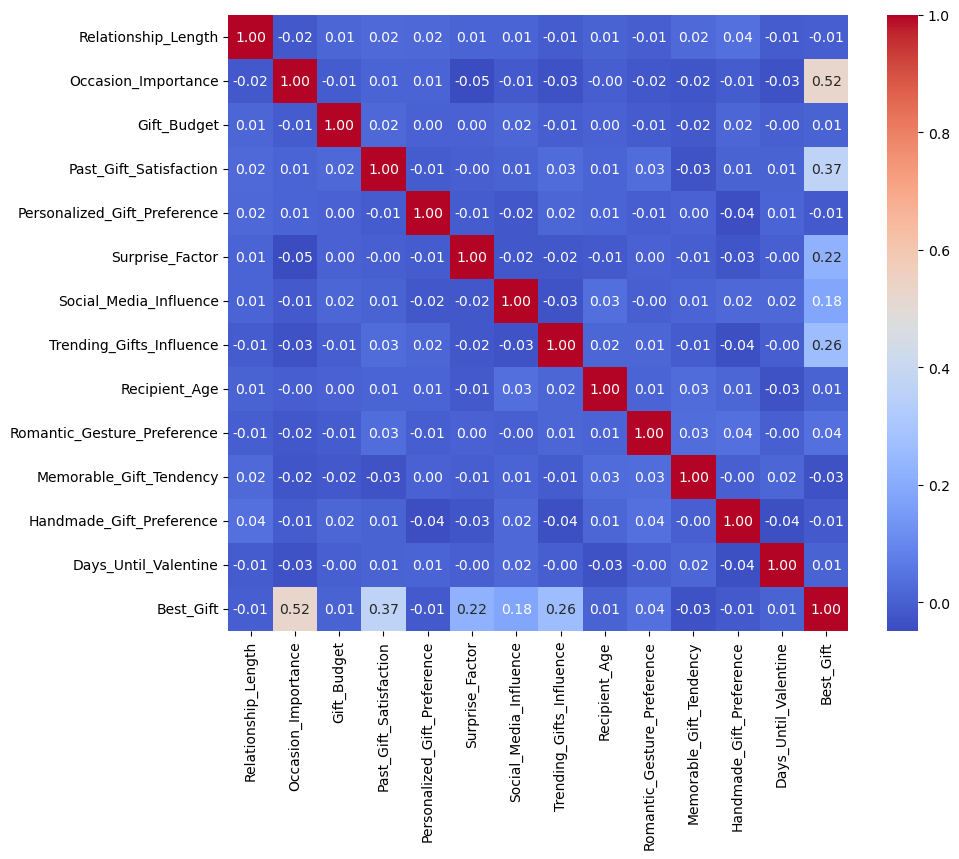

In [ ]:
# Calculate the correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


#**Visualize the Correlation Matrix**
#Using a heatmap to visualize the correlation matrix can make it easier to interpret. This is typically done with the seaborn library:

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

In [39]:
df["Past_Gift"].unique()

array(['Handmade', 'Gadget', 'Subscription', 'Flowers', 'Book',
       'Experience', 'Jewelry', 'Clothing'], dtype=object)

In [40]:
df["Best_Gift"].unique()

array([5.62796722, 3.38161157, 4.6149546 , ..., 6.20516967, 5.60478009,
       2.05986438])

In [41]:
# merge two similar value to one vlaue
def mergeData(df, column_name, value_one, value_two):
    df[column_name] = df[column_name].replace(value_one, value_two)

In [42]:
# encode column's value
def hot_encode(df):
       categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
       encoder = OneHotEncoder(sparse_output=False)
       one_hot_encoded = encoder.fit_transform(df[categorical_columns])

       one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
       df_encoded = pd.concat([df, one_hot_df], axis=1)
       df_encoded = df_encoded.drop(categorical_columns, axis=1)

       return df_encoded

In [43]:
#  ordinal encode y values
# def label_encode(df):
#     encoder = LabelEncoder(categories=[df['Best_Gift'].unique()])
#     df['Best_Gift_Encoded'] = encoder.fit_transform(df[['Best_Gift']])
#     print(df[['Best_Gift', 'Best_Gift_Encoded']].head())
#     return df['Best_Gift_Encoded']


from sklearn import preprocessing 
  
def label_encode(df):
# label_encoder object knows  
# how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 
    
    # Encode labels in column 'species'. 
    df['Best_Gift_Encoded']= label_encoder.fit_transform(df['Best_Gift']) 
    
    df['Best_Gift_Encoded'].unique() 
    print(df[['Best_Gift', 'Best_Gift_Encoded']].head())

    return df['Best_Gift_Encoded']
 
          


In [44]:
def clean_data(df):
    


    # split X and y
    # use hot encoding to encode some columns in x 
    X = df.drop(columns=['Best_Gift'])
    X = hot_encode (X)

    # use OrdinalEncoder to encode "Best_Gift" column and get y
    y = label_encode(df)

    
    return X, y









  




In [45]:

# Models to use in our pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



from sklearn.tree import DecisionTreeRegressor

# Preprocessing dependencies
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import mean_squared_error, r2_score

def r2_adj(X, y, model):
    """
    Calculates adjusted r-squared values

    Args:
    X: Independent variables, the data to fit
    y: dependent variable, the target data to try to predict
    model: The estimator or object to use to train the data

    Returns: adjusted r sqaured value accountign for number of predictors
    """
    r2 = model.score(X, y)
    n = X.shape[0]
    p = y.ndim


def model_generator(X, y):
    y = y.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

    models = {
        "RF": RandomForestClassifier(),
        'DT': DecisionTreeClassifier(),
        'SVC': SVC(),
        'AB': AdaBoostClassifier()
    }


    for  name, model in models.items():
        pipeline = Pipeline([
            ("Scale", StandardScaler(with_mean=False)),
            (name, model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        print("name:", name, "score:", pipeline.score(X_test, y_test))

    


In [ ]:
def model_optimization(df, features, target):
    
    #Parameter grid for SVR
    estimator__C= [1, 10, 100, 1000]
    param_grids['SVR'] = {
                    'model__C': estimator__C,
                    'model__kernel': ['linear', 'rbf'],
                    'model__gamma': ['scale', 'auto', 0.001, 0.0001]}
    
    # Parameter grid for RANDOM FOREST. 
    # The grids for min_samples_split
    min_samples_split_grids = [2, 20, 200]
    # The grids for min_samples_leaf
    min_samples_leaf_grids = [1, 20, 200]
    # Update param_grids
    param_grids['RFC'] = {'model__min_samples_split': min_samples_split_grids,
                         'model__min_samples_leaf': min_samples_leaf_grids}

    # Parameter grid for GRADIENT BOOSTING The grids for learning_rate
    learning_rate_grids = [10 ** i for i in range(-4, 2)]

    # The grids for min_samples_leaf
    min_samples_leaf_grids = [1, 20, 100]

    # Update param_grids
    param_grids['HGBC'] = {'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}
        
    # The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
    best_score_params_estimator_gs = []

    # For each model
    for acronym in pipes.keys():
        
        print("===============================")
        print(f"Optimizing {acronym} .........")
        # GridSearchCV
        gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='r2',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose =1)
        
        # Fit the pipeline
        gs = gs.fit(X_train, y_train)
        
        # Update best_score_params_estimator_gs
        best_score_params_estimator_gs.append([acronym, gs.best_score_, gs.best_params_, gs.best_estimator_])
        
        print(f"{acronym} best R² score: {gs.best_score_:.4f}")
        
    # Sort by best score
    best_score_params_estimator_gs.sort(key=lambda x: x[0], reverse=True)
    
    results_df = pd.DataFrame(
        best_score_params_estimator_gs,
        columns=['model name', 'best_score', 'best_params', 'best_estimator']
    )
        
    return results_df.sort_values(by='best_score', ascending=False)
   

In [ ]:
X, y = clean_data(df)

model_generator(X, y)

model_optimization(df, X, y)

   Best_Gift  Best_Gift_Encoded
0   5.627967               1206
1   3.381612                152
2   4.614955                607
3   7.016141               1833
4   4.569973                581


c:\Users\sso\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


name: RF score: 0.0
name: DT score: 0.0


c:\Users\sso\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


name: SVC score: 0.0


c:\Users\sso\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sso\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


name: AB score: 0.0
